# 0. Pre-requisito

Se debe tener ya lista la limpieza del Set de Datos ogiginal, para proceder con el EDA. 

# 1. El problema del Negocio 🎯

Una entidad bancaria contrató a una empresa de mrketing para contactar telef+onicamente a posibles clientes para determinar si están interesados o no en adquirir un producto de crédito con el banco. 

¿Qué perfil de cliente tienen mayor potencial de conversión?

# 2. El Set de Datos 📉
La info recolectada por la empresa de mercadeo se encuentra en un archi CSV () con 45,189 filas y 17 columnas. 

Cada registro tiene 16 características (las primeras 16 columnas) y una categpría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son: 

Las columnas son: 

(VARIABLES)
1. **age**: edad (numérica)
2. **job**: tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. **marital**: estado civil (categórica: "married", "divorced", "single")
4. **education**: nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. **default**: si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. **balance**: saldo promedio anual en euros (numérica)
7. **housing**: ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. **loan**: ¿tiene créditos de consumo? (categórica: "yes", "no")
9. **contact**: medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. **day**: último día del mes en el que fue contactada (numérica)
11. **month**: último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. **duration**: duración (en segundos) del último contacto (numérica)
13. **campaign**: número total de veces que fue contactada durante la campaña (numérica)
14. **pdays**: número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. **previous**: número de veces que ha sido contactada antes de esta campaña (numérica)
16. **poutcome**: resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. **y**: categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

# 3. Lectura del Set de Datos

In [76]:
#Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
%matplotlib inline

In [28]:
#Leemos el Set de Datos, desde lo tenemos guardado

data = pd.read_csv("dataset_cleaned.csv") #Aquí declaramos la variable "data" para que contenga al Set de Datos

In [30]:
print(data.shape) #Esto me dice cuántas (filas, columnas) tiene mi Set de Datos

(45189, 17)


In [13]:
data.head() #Esto me muestra las primeras 5 filas de mi Set de Datos 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


# 4. Análisis Exploratorio 🕵️‍♀️🔍

El objetivo es usar herramientas de visualización y estadística para: 
 * Crear un entendimiento mental del Set de Datos.
 * Empezar a tener uan idea de la respuesta a la principal que nos planteamos "¿Qué perfil tienen los clientes con mayor potencial de conversión?"

Llevaremos a cabo estas fases: 

Fase 1: Análisis de cada variable de manera individual.

Fase 2: Análisis univariado: relacion de cada variable predicttora con la variable a predecir. 

Fase 3: Análisis bivariado: relación de pares de variables predictoras con la variable a predecir. 

# 4.1 Fase 1: Análisis de cada variable de manera individual 🔂

Nos permite entender las características generales de cada variable de nuestro Set de Datos. 

In [31]:
#Con data.info() podemos verlas variables categóricas
#(Dtype=object)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [20]:
#Tomaremos las variables categóricas y generarémos gráficos de barras con ellas

col_cat = ['job','marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'poutcome', 'y']

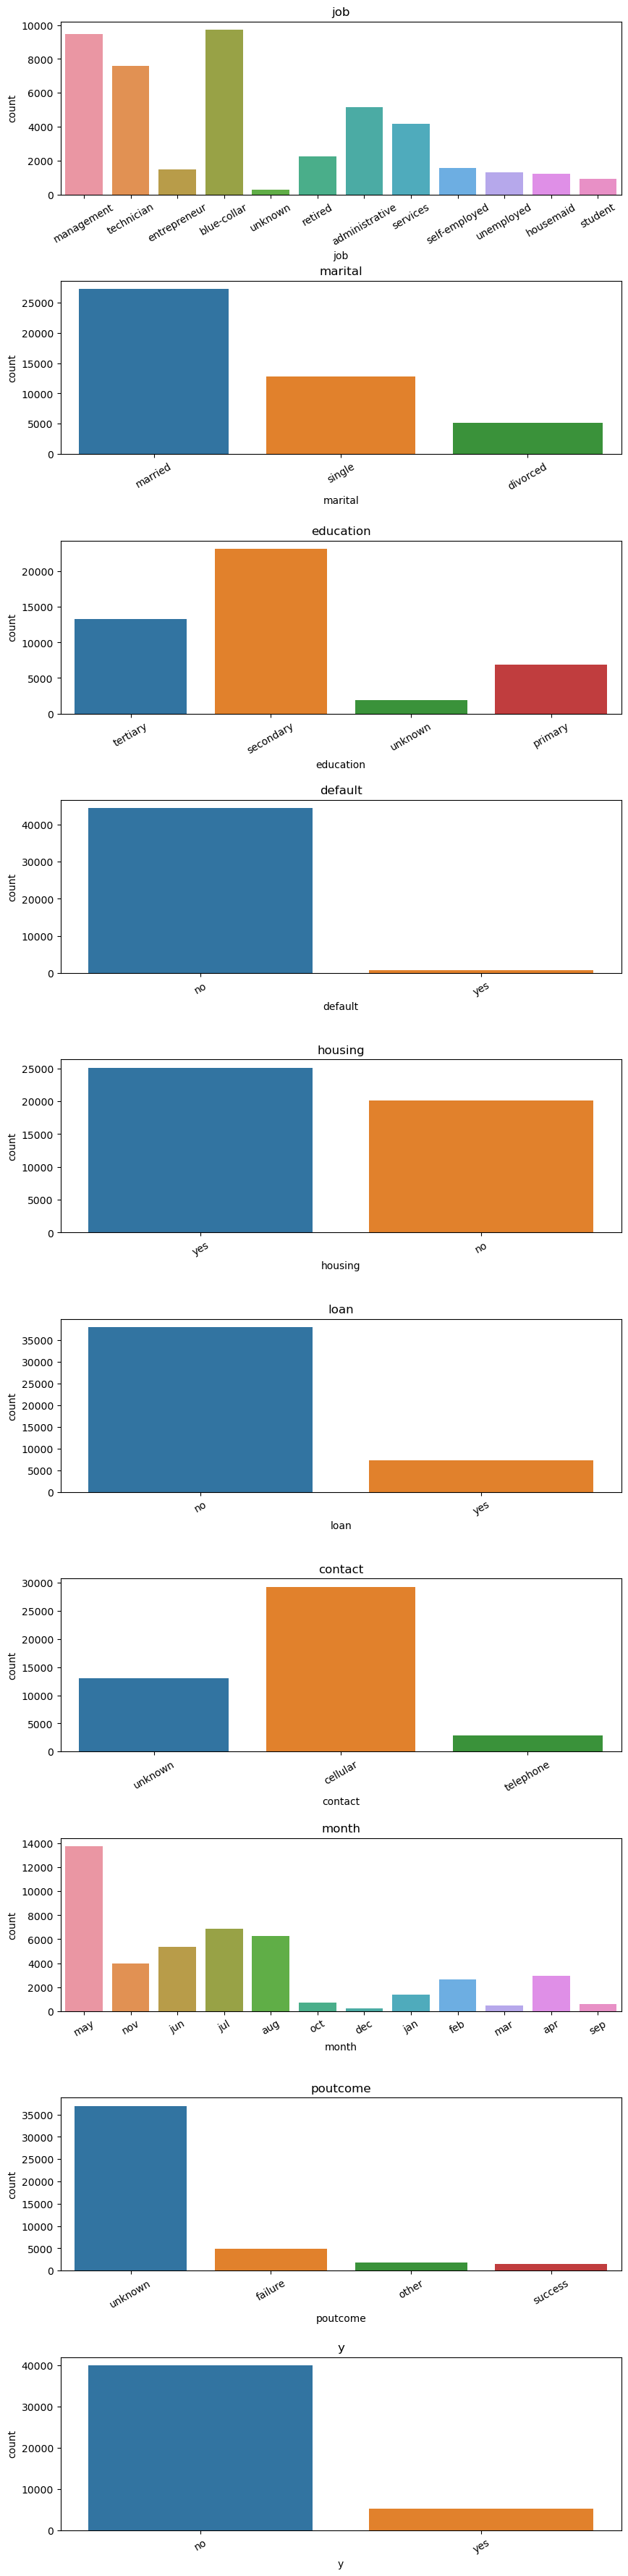

In [32]:
#Graficos de barras de conteo
fig,ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate (col_cat):
    sns.countplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [26]:
print(data.shape)

(45189, 17)


In [29]:
count_celular = data['contact'].str.contains('celular',case=False).sum()
print(count_celular)

0


### 👀 Observaciones: 
Niveles de cada variable de interés:

* **job:** 12
* **marital:** 3 (married, single divorced)
* **education:** 4 (primary, secondary, tertiary, unknown)
* **default:** 2 (yes, no). En este caso la mayoría de contactados tienen valores "no". 
* **housing:** 2 (yes, no). En este caso el set está relativamente balanceado.
* **loan:** 2 (yes, no). En este caso, la gran mayoría contiene valores "no". 
* **poutcome:** 4 (unknown, failure, other, success). La gran mayoría está en el nivel "unknown"
* **y:** 2 (no, yes) La gran mayoría está en el nivel "No". Si mas adelante se implemente algún modelo predictivo con Machine Learning se debe tener en cuenta este desbalance. 

In [41]:
# Las columnas "contact", "month", "day", "duration", "campaign", "pdays" y "previous" no aportan información relevante sobre el cliente y su potencial de conversión. Por lo tanto, las eliminarémos. 
# Las columnas "age", "job", "marital", "education", "default", "balance", "housing", "loan", "poutcome", "y" las conservaremos y analizaremos. 

data.drop(columns=['contact','month','day','duration','campaign','pdays','previous'],inplace=True)
data.columns

KeyError: "['contact', 'month', 'day', 'duration', 'campaign', 'pdays', 'previous'] not found in axis"

In [42]:
# Sale ese error porque ya las borramos

In [43]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'poutcome', 'y'],
      dtype='object')

Ahora veremos el comportamiento de las variables numéricas "age" y "balance"

In [45]:
# Podemos extraer algunas variabes estadísticas descriptivas básicas

data.describe()

,age,balance
count,45189.000000,45189.000000
mean,40.936445,1374.012149
std,10.618502,3924.370039
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,527532.000000


/Users/rociodelmar/Desktop/sample_project/heart-disease-project/env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rociodelmar/Desktop/sample_project/heart-disease-project/env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


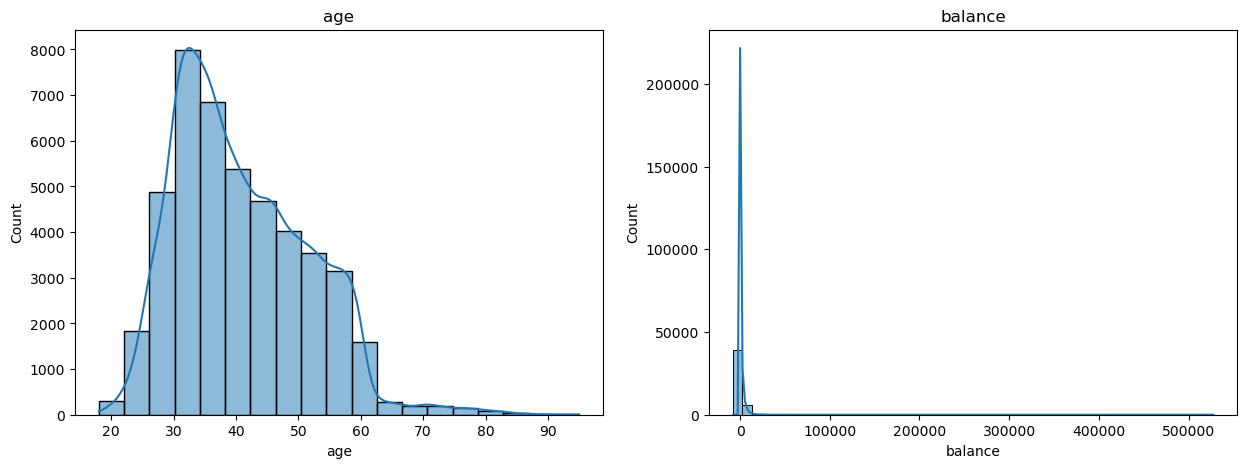

In [46]:
# Pero muchas veces es más útil graficar dichas variables 

#Dibujar histogramas
col_num = ['age', 'balance']

fig, ax = plt.subplots (nrows=1, ncols=2,figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'age':
        nbins=19
    else:
        nbins=50
    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde=True)
    ax[i].set_title(col)

In [47]:
# Veamos en detalle lo que ocurre con el balance

data['balance'].describe()

count     45189.000000
mean       1374.012149
std        3924.370039
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      527532.000000
Name: balance, dtype: float64

**Observaciones**

1. La mayor parte del grupo contactado tiene entre 30 a 50 años. Sesgo hacia los 30-40 años.
2. El 75% del grupo contactado tiene saldos negativos o que no superan los 1,500 euros (aproximadamente). 

# 4.2 Análisis Univariado 1️⃣〰️🔍〰️1️⃣

Teniendo claras algunas características generales de cada dato individual, la idea ahora es analizar si existe alguna relación entre las posibles variables predictoras ('age','balance','job','marital','education', etc.) y la variable a predecir ('y'). 

Esto se conoce como análisis univariado. 

Este análisis nos mostrará sólo una faceta de las posibles relaciones entre c/u de la variable predictora y la variable a predecir. **Esto NO es suficiente para extraer conclusiones definitivas 🚫☝️.**



In [50]:
#Comencemos por determinar la representación de la variable a prededir de fforma binaria.
# "y" se refiere a ¿el cliente convirtió? es decir, ¿el cliente adquirió el producto bancario? 
# "yes" = 1 , "no" = 0 
# Si el cliente adquirió el producto es = 1.  Si el cliente NO adquirió el producto = 0

diccionario = {'yes':1, 'no':0}
binario = data ['y'].map(diccionario) 
data['y_bin']=binario

# De esta forma resulta sencillo calcular la Tasa de Conversión. 
# Tasa de Conversión es igual al promedio de la columna 'y_bin' o el total de todos los que dijeron que sí, entre todos los que fueron llamados. 

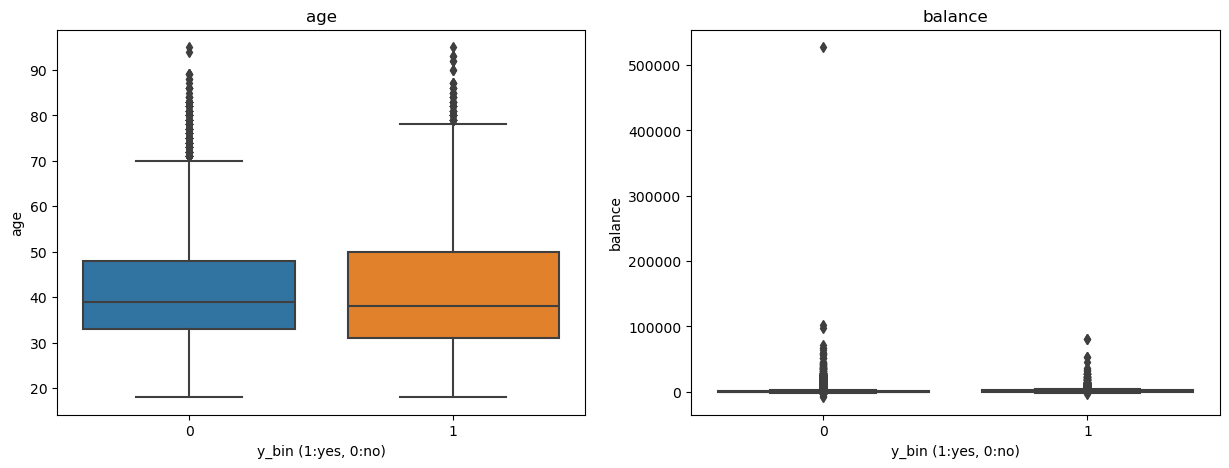

In [51]:
#Anaizar la relación entre las variables numéricas y la variable a predecir "y"

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=.25)

for i, col in enumerate(col_num):
    bplt = sns.boxplot(x="y_bin", y=col, data=data, ax=ax[i])
    ax[i].set_xlabel('y_bin (1:yes, 0:no)')
    ax[i].set_title(col)

**Observaciones**

**Gráfica Age** 
1. Tanto los que dijeron que no, como los que dijeron que sí, se ven en un rango similar de edad. Entre 30-50.

**Gráfica Balance** 
1. En la grafica de "balance" tampoco se observan diferencias significativas entre las personas que adquirieron o no el producto.

**Ambas**
1. **Por ahora,** pareciera que estas dos variables numéricas no son variables predictivas.
**Sin embargo, aun no podemos descartarlo.**
   

Estas dos variables numéricas se encuentran en un ampli rango. 
Podemos calcular las tasas de conversión definiendo intervalos más pequeños para estas variables numéricas y ver si podemos obtener información más relevante ára este análisis: 

In [60]:
# Vamos a crear una función para graficar tasas de conversión 

def graficar_tasas_conversion(var_predictora, var_predecir, type= 'line', order=None):
    x,y= var_predictora,var_predecir

    # Generar agrupaciones (groupby), calcular tasa de conversión (mean), multiplicarla por 100 (mul(100))
    grupo= data.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index()

    # Y generar gráfica
    if type=='line': #Útil para rangos continuos
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictora, y='tasa_conv',data=grupo)
        plt.grid()
    elif type=='bar': #útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(14,6))
        sns.scatterplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()
            



/Users/rociodelmar/Desktop/sample_project/heart-disease-project/env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rociodelmar/Desktop/sample_project/heart-disease-project/env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


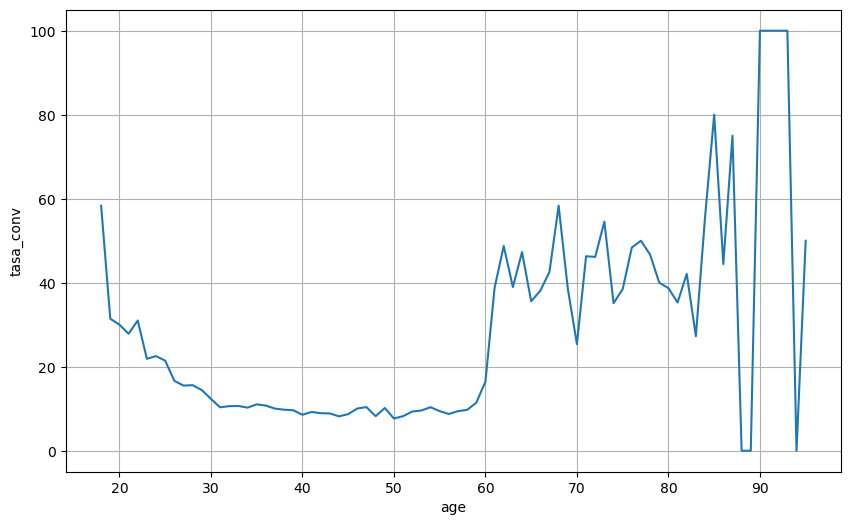

In [61]:
# Y graficar las tasas de conversión para la variable edad
graficar_tasas_conversion ('age','y_bin')

**Observaciones**
* En este caso SÍ observamos diferencias en las tasas de conversión según la edad.
* Podríamos establecer tres rangos aproximados: 18-25 años, 26-29 años y 60 años en adelante 

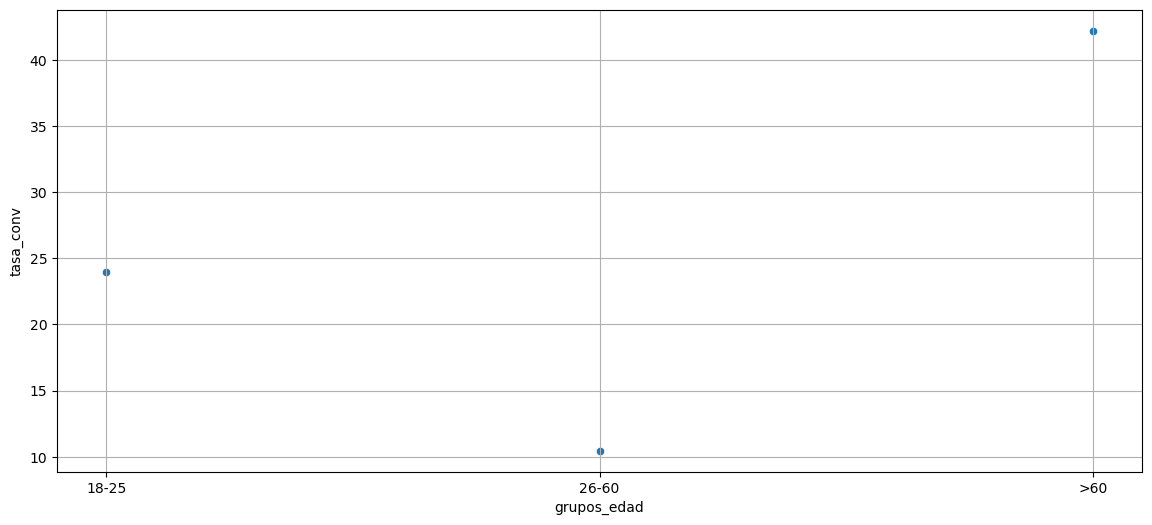

In [65]:
#Creemos subgrupos de edades y calculemos las tasas de conversión de cada paso

# Nueva columna en el Set de Datos: "grupos_edad"
data.loc[:,'grupos_edad']="18-25"
data.loc[data['age']>60,'grupos_edad']=">60"
data.loc[(data['age']>25)&(data['age']<=60),'grupos_edad']="26-60"

#Y grafiquemos la tasa de conversión para esta nueva columna
graficar_tasas_conversion('grupos_edad','y_bin',type='bar')



**Observaciones**
Tenemos 3 rangos de edad bastante diferenciados y para los cuales se alcanzan diferentes tasas de conversión: 

- 18-25 años --> 24%
- 26-60 años --> 11%
- más de 60 años --> 43%

In [71]:
# Y limpiamos nuestro Set de Datos,  eliminando la columna "age" que ya no necesitamos y dejamos solo la de grupos de edad 

data.drop(columns=['age'], inplace=True)

KeyError: "['age'] not found in axis"

In [74]:
#Realicemos el mismo análisis pero para la variable "balance"
graficar_tasas_conversion('balance','y_bin',type='scatter')

Aquí debió salir una grafica, y no salió.

No resulta fácil ver un patrón. Al igual que con la edad generarémos diferentes rangos:

* <0
* 0-4000
* 4000-8000
* 8000-12000
* 12000-16000
* 16000-20000
* mayor que 20000

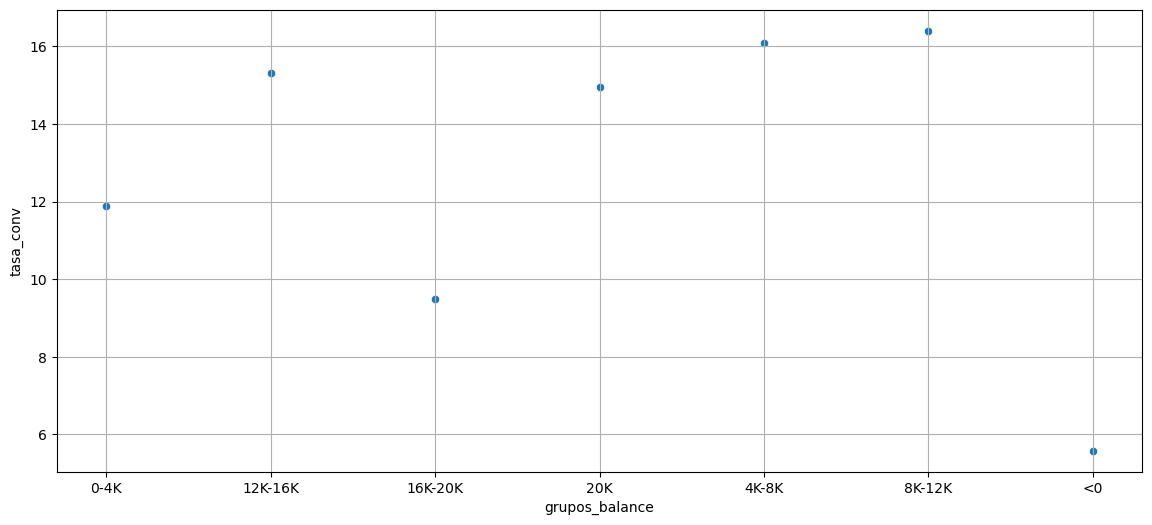

In [77]:
#Nueva columna en el dataset: "grupos_balance"
data.loc[:,'grupos_balance']="<0"
data.loc[(data['balance']>=0)&(data['balance']<4000),'grupos_balance'] = "€0-4K"
data.loc[(data['balance']>=4000) & (data['balance']<8000),'grupos_balance'] = "€4K-8K"
data.loc[(data['balance']>=8000) & (data['balance']<12000),'grupos_balance'] = "€8K-12K"
data.loc[(data['balance']>=12000) & (data['balance']<16000),'grupos_balance'] = "€12K-16K"
data.loc[(data['balance']>=16000) & (data['balance']<20000),'grupos_balance'] = "€16K-20K"
data.loc[data['balance']>=20000,'grupos_balance'] = "€20K"

# Y grafiquemos la tasa de conversión para esta nueva columna
#graficar_tasas_conversion('grupos_balance','y_bin',type='bar')

orden=['<0','0-4K','4K-8K','8K-12K','12K-16K','16K-20K'<'20K']
graficar_tasas_conversion('grupos_balance','y_bin',type='bar', order=orden)



**Observaciones** 

Al parecer hay un patrón. Si organizamos las barras de forma ascendente observamos:

* <0: 6%
* 0-4K: 12%
* 4K-8K: 16%
* 8K-12K: 16%
* 12K-16K: 15%
* 16K-20K: 9%
* Mayor a 20K: 15%

(Excepto en el rango 16K-20K) En general un mayor nivel de liquidez genera una mayor tasa de conversión.

Para simplificar el ejercicio de análisis, podríamos definir 4 rangos de interés:
* 0-4K
* 4K-16K    -- (en este juntamos 3 grupos anteriores... el de 4-8 el de 8-12 y el de 12-16)
* 16K-20K
* Mayor a 20K

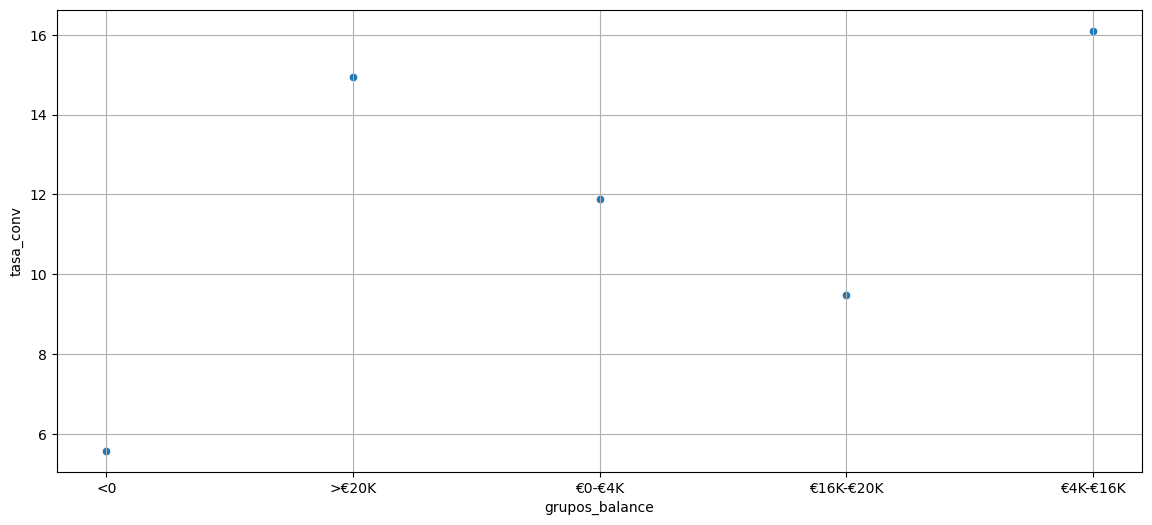

In [91]:
# Generamos el Set de Datos únicamente con estos 4 rangos y observamos el comportamiento

#Nueva columna en el Set de Datos: "grupos_balance"

data.loc[:,'grupos_balance']= "<0"
data.loc[(data['balance']>=0)&(data['balance']<4000),'grupos_balance']="€0-€4K"
data.loc[(data['balance']>=4000)&(data['balance']<16000),'grupos_balance']="€4K-€16K"
data.loc[(data['balance']>=16000)&(data['balance']<20000),'grupos_balance']="€16K-€20K"
data.loc[data['balance']>=20000,'grupos_balance'] = ">€20K"



# Y graficamos la Tasa de Conversión para esta nueva columna
orden = ['<0','0-4K','4K-16K','16K-20K','>20K']
graficar_tasas_conversion('grupos_balance','y_bin',type='bar',order=orden)


In [92]:
# Y eliminamos la columna "balance"
data.drop(columns=['balance'],inplace=True)

Ahora realizaremos un análisis similar pero para las variables categóricas:

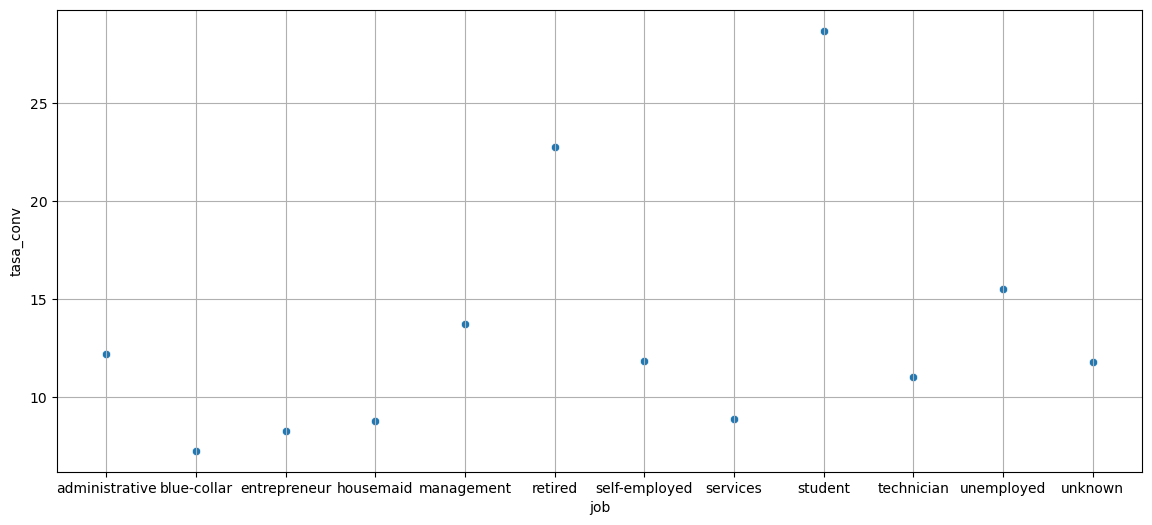

In [94]:
graficar_tasas_conversion('job','y_bin',type='bar')

**Observaciones**

* Las tasas más altas de conversión son las de "retired" 22.5% aprox y "student" 28% aprox.
* "job" podría ser una variable predictora. 

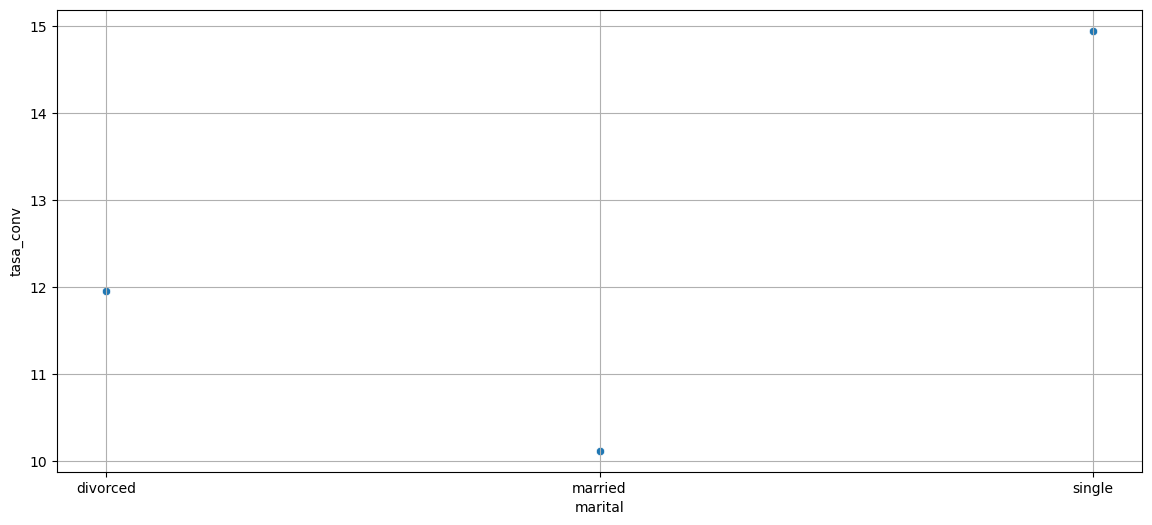

In [95]:
#Marital , ahora graficarémos esta variable categórica

graficar_tasas_conversion('marital', 'y_bin', type='bar')

**Observaciones** 

* Las tasas de conversión para "divorced", "married" y "single" son 12%, 10% y 15% aproxi. y respectivamente.
* Las tasas de conversión son muy similares entre los diferentes niveles de la variable "marital"
* "Marital" NO parece ser una variable predictora

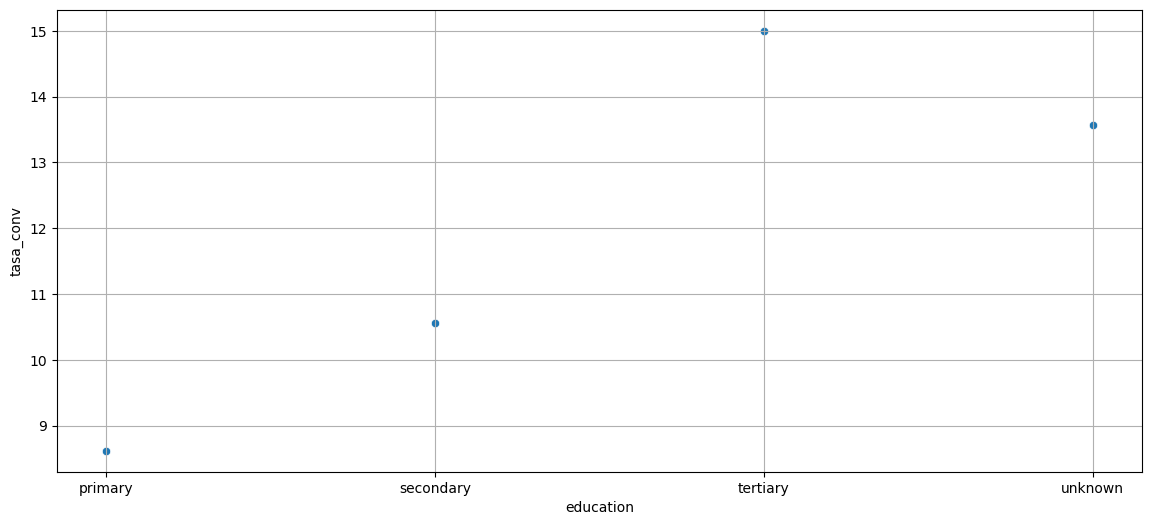

In [96]:
# Education, ahora graficarémos esta variable categórica

graficar_tasas_conversion('education','y_bin',type='bar')

**Observaciones**
Respectivamente hay 9% , 10.5%,  15% y 13.5%

* Se ve un cierto incremento a mayor nivel de estudios. Tertiary = 15%
* Esta variable podría ser una variable predictora (influir de cierta manera relevante).

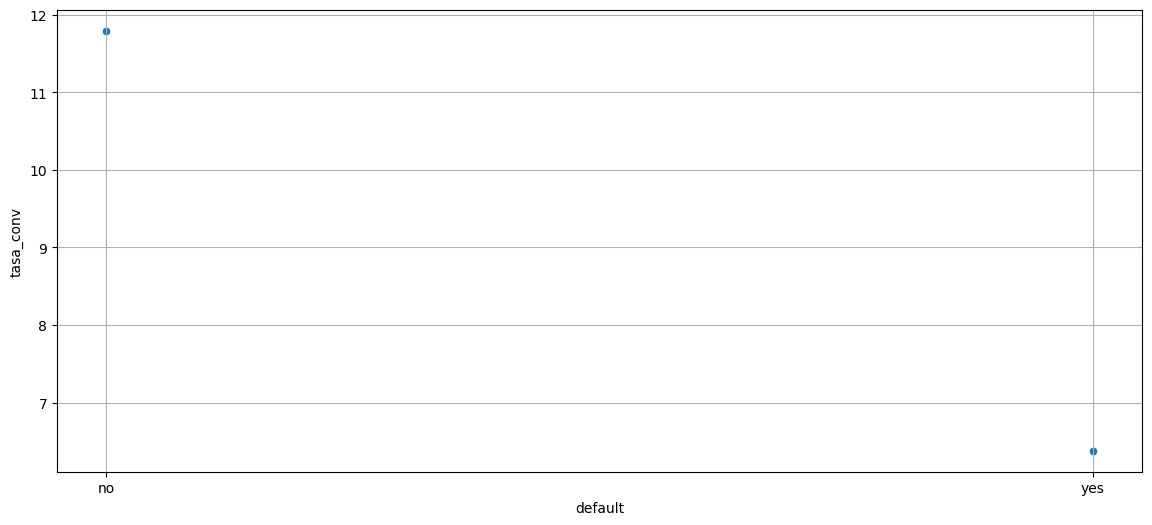

In [97]:
# default, ahora graficarémos esta variable categórica
graficar_tasas_conversion('default','y_bin',type='bar')

**Observaciones**

* 12%  y 6%  aprox
* Las Tasas de Conversion son casi el doble para los que nunca han dejado de pagar sus obligaciones.
* "Default" sí parece ser una variable predictora.

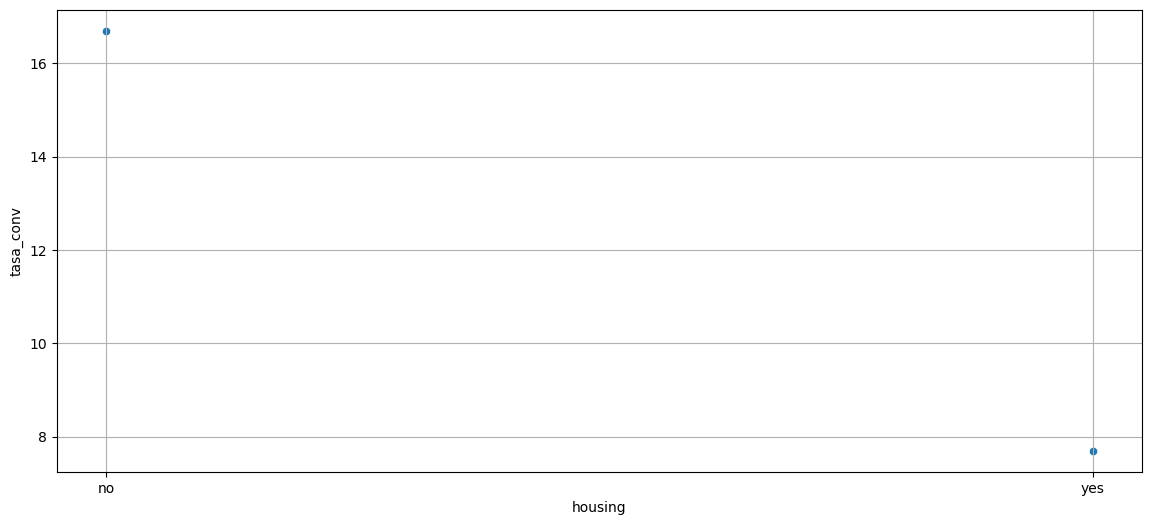

In [98]:
# housing, ahora graficarémos esta variable categórica

graficar_tasas_conversion('housing','y_bin',type='bar')

**Observaciones**

* Los que tienen crédito hipotecario: 8%
* Los que NO tienen crédito hipotecario 16.5%
* Quienes NO tienen crédito hipotecario tienen significativamente mayor Tasa de Conversión
* "Housing" sí es una variable predictora.

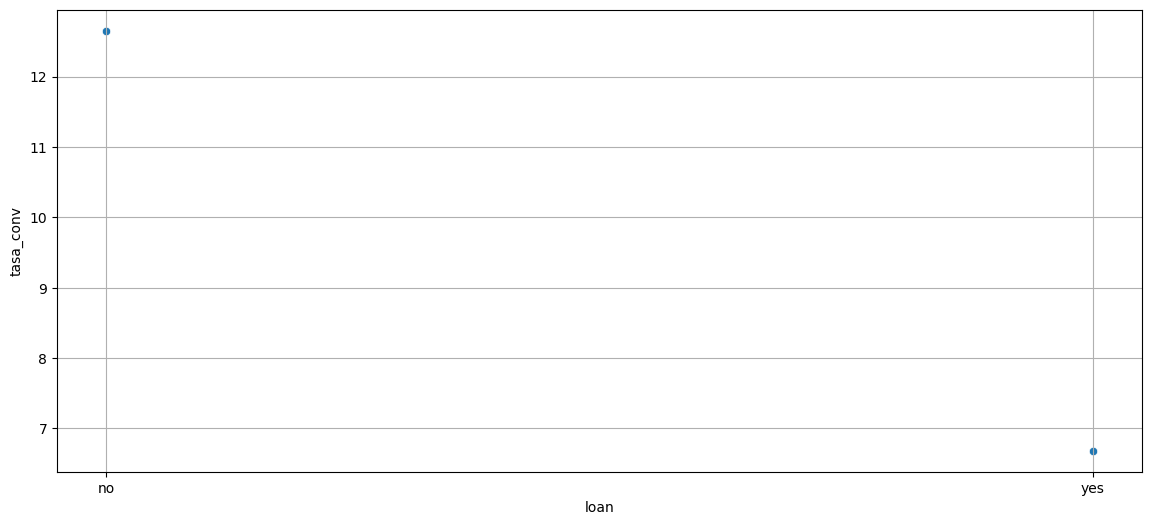

In [99]:
# loan, ahora graficarémos esta variable categórica
graficar_tasas_conversion('loan','y_bin',type='bar')

**Observaciones**
* Las personas que tienen creditos de consumo, convirtieron 6.5%
* Las personas que NO tienen créditos de consumo, convirtieron 12.5%
* Ocurre algo similar que con "housing". Quien no tiene crédito de consumo, presentan más tasa de conversión.
* "loan" sí es una variable predictora. 

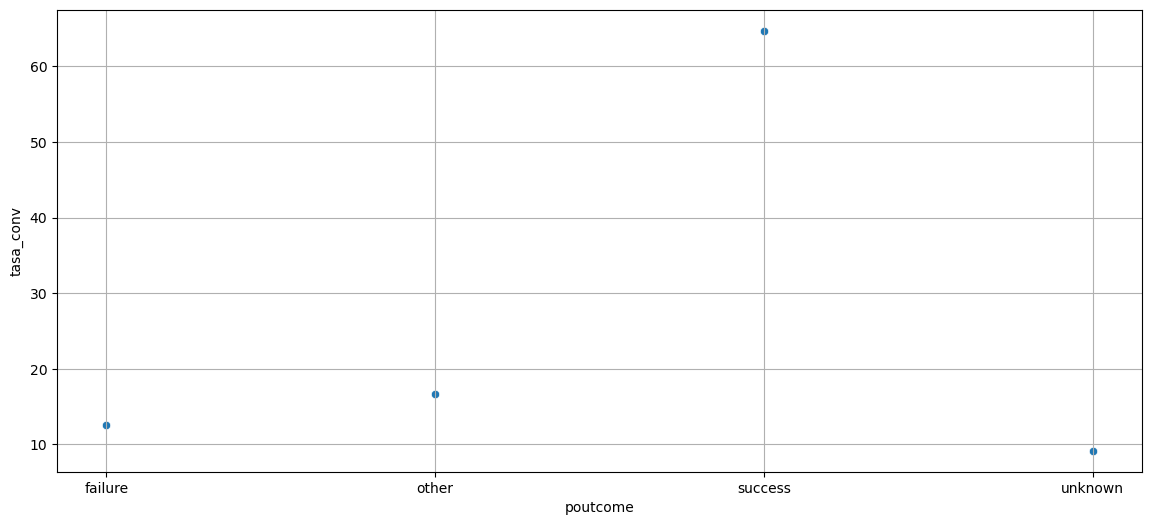

In [100]:
# poutcome, ahora graficarémos esta variable categórica
graficar_tasas_conversion('poutcome','y_bin',type='bar')

**Observaciones**

* unknown: 10%
* failure: 10%
* otro: 16%
* success: 64%
* Los clientes que adquirieron un producto del banco en la campaña anterior de marketing, tuvieron una conversión del 64% positiva en la campaña actual de marketing. 
* Definitivo, es una variable predictora. 

# EN RESUMEN...👇 (Vamos al punto)

La Tasa de Conversión se ve afectada por las siguientes variables predictoras (en orden de mayor a menor impacto):

1. **"poutcome"**: 64% de conversión para "success"
2. **"job"**:  22.5% para "retired" y 28% "student"
2. **"grupos_balance"** y **"grupos_edad"**, ambos intervalos con 16% de conversión (aprox). 
3. **"housing"** 16.5% para los que NO tienen un crédito hipotecario
4. **"default"** y **"loan"** tienen conversión de 12%-12.5% para aquellos que no tienen un credito de consumo y que nunca han dejado de pagar sus obligaciones.  
5. **"marital"** y **"education"**,  niveles de conversión ligeramente superiores para los "single" 15% con y los "terciary" 15%

# 4.3 Análisis Bivariado 2️⃣〰️🔍〰️1️⃣

El siguiente paso en este Análisis Exploratorio de Datos, es probar posibles interacciones entre **pares de variables predictoras** y su impacto en la **variable a predecir**.

Esto se conoce como **Análisis Bivariado**.

Existen muchas posibles combinaciones, por lo que analizarémos **únicamente los pares con mayor potencial** según nuestro orden  de mayor a menor impacto definido en nuestro **RESUMEN 👇** del **Análisis Univariado 1️⃣〰️🔍〰️1️⃣**. 

Para hacer este a nálisis se pueden usar: gráficas y herramientas estadísticas sofisticadas. 
Nosotros usarémos gráficas. 

⚠️⚠️⚠️ ADVERTENCIA ⚠️⚠️⚠️

Este análisis nos mostrará **sólo una faceta** de las **posibles relaciones** entre **pares de variables predictoras** y la **variable a predecir**, y **no es suficiente para extraer conclusiones definitivas** 🚫☝️ .  (Caso similar que en el Análisis Univariado).
 
El Análisis Bivariado nos dá más insights que el Análisis Univariado. 

**Tasa de Conversión para dos columnas**


In [106]:
def graficar_tc_bivariada(col_list, orden=None):
    tc = data.groupby(col_list)['y_bin'].mean().to_frame().reset_index()

#Para la Gráfica
    plt.figure(figsize=(13,7))
    ax=sns.pointplot(x=tc['y_bin'],y=tc[col_list[0]], hue=tc[col_list[1]],join=False, order=orden)
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)
    plt.title(f'Tasa de conversión para "{col_list[0]}" y "{col_list[1]}"')
    plt.xlabel('Tasa de conversión(%)')
    plt.xlim((0,1));

### 1. Par de variables "poutcome" y "job"

**"poutcome"**: 64% de conversión para "success".

**"job"**: 22.5% para "retired" y 28% "student".

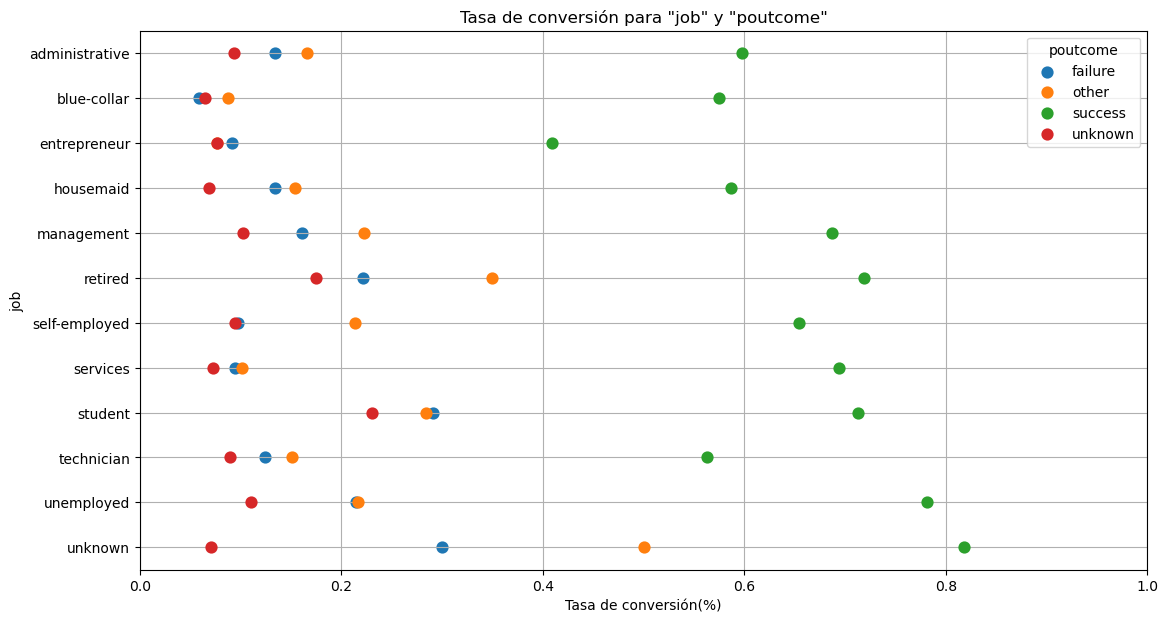

In [109]:
graficar_tc_bivariada(['job','poutcome'])


**Observaciones**

* 1. Tasa de Conversión de 82% a 60% : unknown, unemployed, retired, student, services, management, self-emplyed, administrative. 

### 2. Par de variables "poutcome" y "grupos_balance"

**"poutcome"**: 64% de conversión para "success".

**"grupos_balance"**: 16% para el grupo 4K-16K

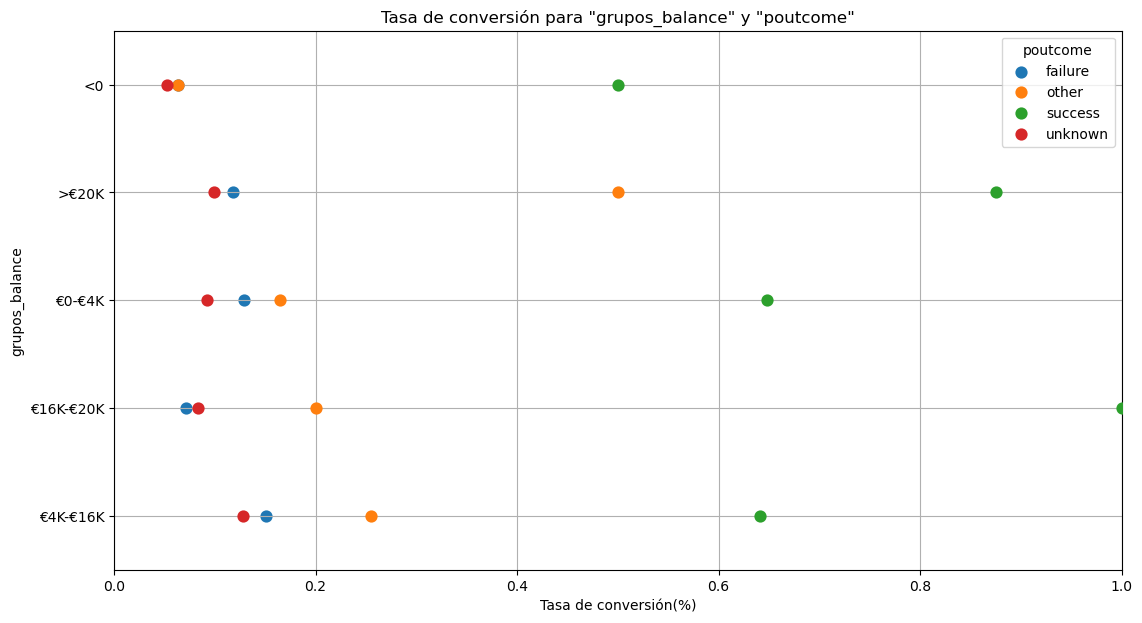

In [111]:
graficar_tc_bivariada(['grupos_balance','poutcome'])

**Observaciones**

1. Tasas de conversión del 64% al 88% para las personas con ingresos entre 16K - 20K.  (antes al analizar solo el rango de balance se obtenia muy baja conversión)
2. Con balance superior a 20K: 88% de Tasa de Conversión. 
3. Con balance entre 0 - 16K: 64% de Tasa de Conversión.

### 3. Par de variables "poutcome" y "grupos_edad"

**"poutcome"**: 64% de conversión para "success".

**"grupos_edad"**:  
    18-25 años --> 24%
    26-60 años --> 11%
más de 60 años --> 43%

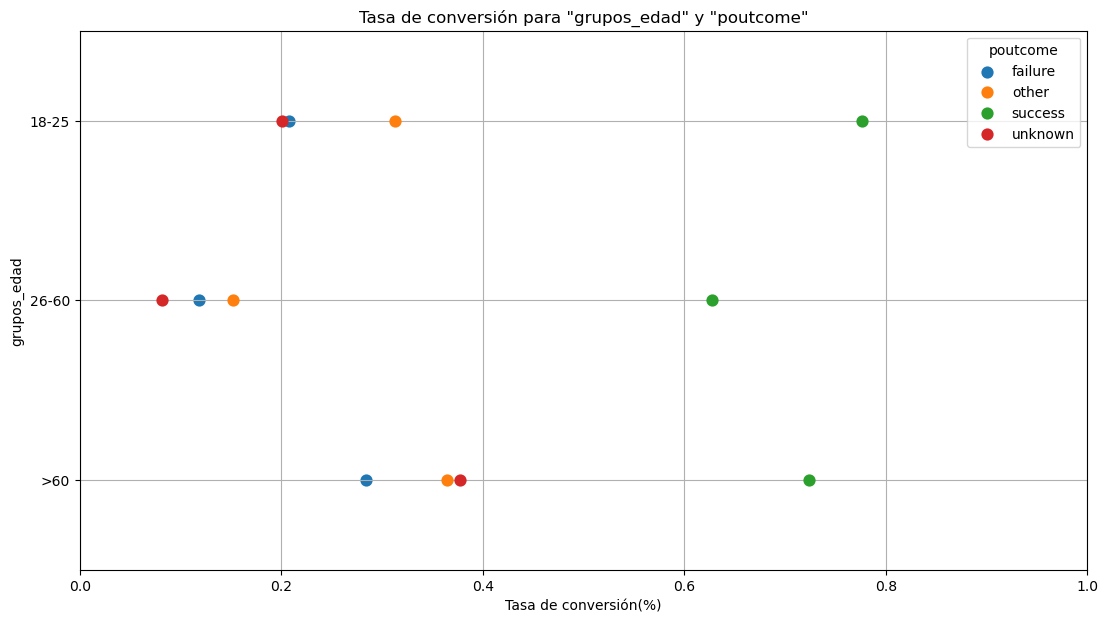

In [116]:
graficar_tc_bivariada(['grupos_edad','poutcome'])

**Observaciones**

 Tasas de conversión superiores de 60% a 78% para los que compraron en la campaña anterior y tienen las siguientes edades:

* Edades 26-60: 62%
* Edades >60: 72%
* Edades 18-25: 78%

### 4. Pares de variables "poutcome" y "default/housing/loan"

**"poutcome"**: 64% de conversión para "success".

**"default/housing/loan"**:  12.5%-16%

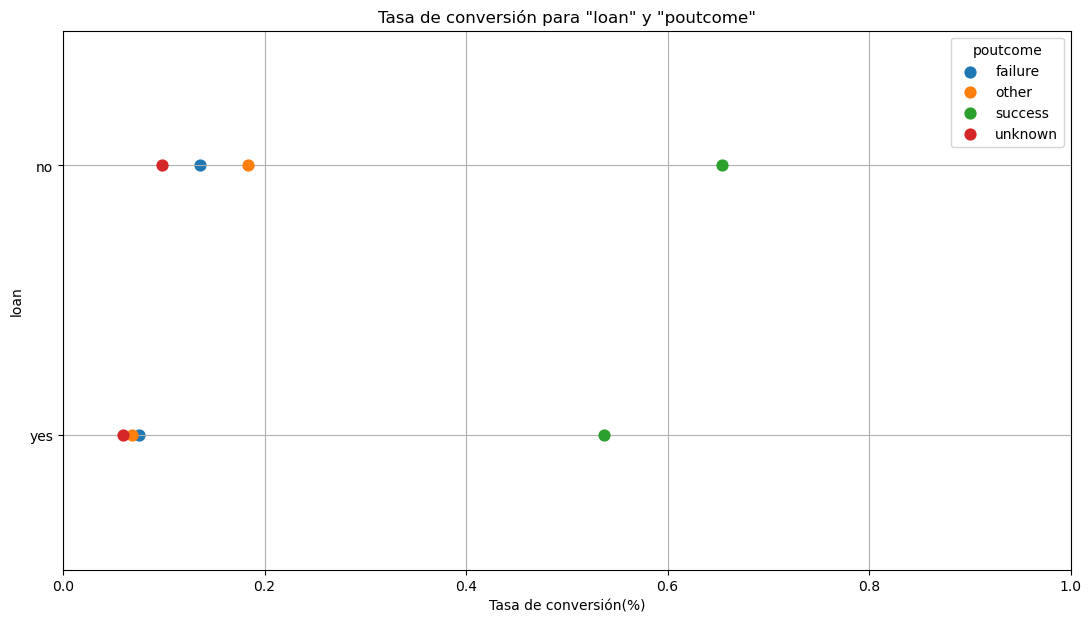

In [118]:
graficar_tc_bivariada(['loan','poutcome'])

**Observaciones**
1. Se alcanzan tasas de conversión superiores a 60% (entre 60% - 65%) para la combinación entre los que sí compraron un producto en la campaña de marketing pasada y los que no tienen crédito hipotecario/crédito de consumo/mora en pagos. 

### 5. Pares de variables "poutcome" y "marital/education"

**"poutcome"**: 64% de conversión para "success".

**"marital/education"**:  15%

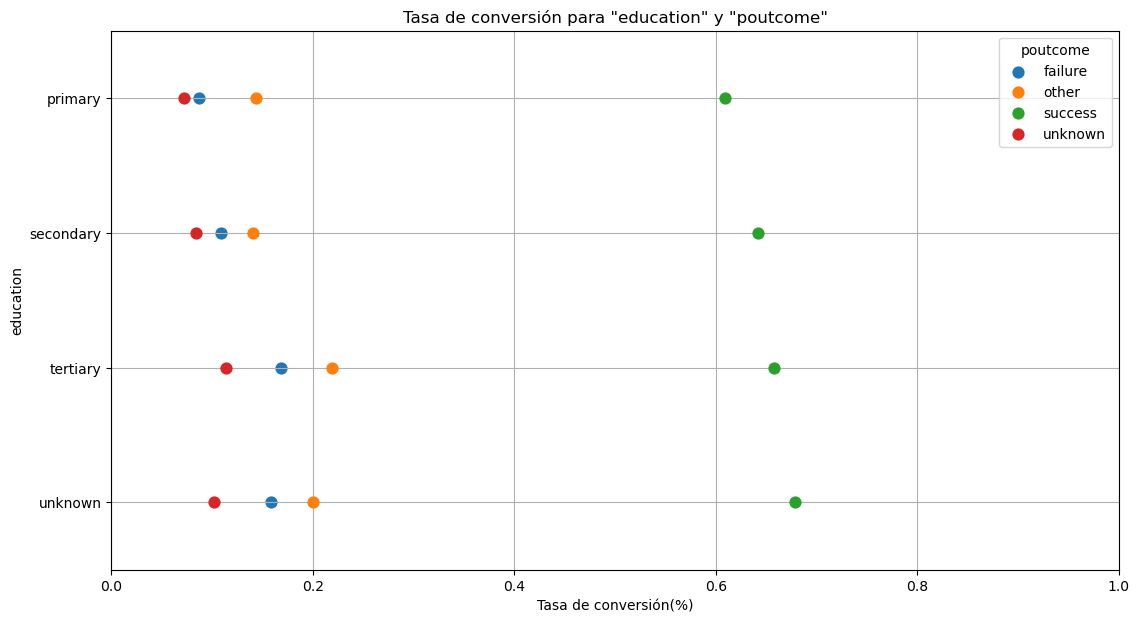

In [119]:
graficar_tc_bivariada(['education','poutcome'])

**Observaciones**
1. Tasas de conversión entre 60% - 65% independientemente de las variables "marital" o "education".
2. Por lo tanto, estas variables no resultan relevantes. 


# Conclusiones 🕵️‍♀️🏆🚩

**1.** La variable "poutcome" seguida de las variables "job", "grupos_balance" y "grupos_edad" sí tienen gran impacto en la tasa de conversión de esta campaña de marketing.


**2.** El perfil del cliente, con base al analisis sería: 


    * Debe haber adquirido el producto bancario de la campaña de marketing anterior (poutcome==success)
    * Perfil laboral (top 3): desempleado, estudiante, jubilado. 
    * Balance en cta bancaria: entre $16K - $20K (preferiblemente)
    * Edad: entre 18-25 años (preferiblemente)
    * Que **NO** cuenta con crédito de consumo, ni crédito hipotecario o que no haya caido en mora. 

**3.** Es posible que la combinación de más de dos variables (análisis multivariado) arroje más insights sobre estos perfiles. 
Pero en este caso la interpretación de los resultados se hace más compleja a medida que analizamos de manera simultánea más y más variables.

**4.** En este punto el paso a seguir sería usar un modelo de Machine Learning que permita encontrar esos patrones que no resultan fáciles de ver con este EDA (Análisis Exploratorio).